In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
import os
#for dylan
#os.environ['PYSPARK_PYTHON'] = '/anaconda/bin/python'

#for oneil
os.environ['PYSPARK_PYTHON'] = '/Users/oneil/anaconda/bin/python'

In [3]:
import findspark
findspark.init()
print findspark.find()

/usr/local/opt/apache-spark/libexec


In [4]:
import pyspark
conf = (pyspark.SparkConf()
    .setMaster('local')
    .setAppName('pyspark')
    .set("spark.executor.memory", "2g"))
sc = pyspark.SparkContext(conf=conf)

In [5]:
import sys
rdd = sc.parallelize(xrange(10),10)
rdd.map(lambda x: sys.version).collect()

['2.7.10 |Continuum Analytics, Inc.| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Continuum Analytics, Inc.| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Continuum Analytics, Inc.| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Continuum Analytics, Inc.| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Continuum Analytics, Inc.| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Continuum Analytics, Inc.| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Continuum Analytics, Inc.| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Continuum Analytics, Inc.| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Continuum Analytics, Inc.| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |

In [6]:
sys.version

'2.7.10 |Continuum Analytics, Inc.| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]'

In [7]:
from pyspark.sql import SQLContext
sqlsc=SQLContext(sc)

In [8]:
## ABOVE IS SPARK SET UP,
## THIS IS PANDAS

index_df=pd.read_csv("index.csv")
print "Shape: " + str(index_df.shape)
index_df.head()

Shape: (3000, 15)


,Entry_No,Source,DNA_UNIQUE_ID,DNA_Designation,DNA_Accno_source,DNA_VARNAME_source,DNA_Othername_source,ORI_COUNTRY,Unnamed: 8,Genetic_Stock_Accno,Genetic_stock_Designation(varname),total seq count,passed qc seq count,depth,Variety Group (Tree)1
0,65,IRRI,IRIS 313-9783,BERENJ 1277 S::IRGC 3461-1-1,IRGC 3461,BERENJ 1277 S,NaN,AFGHANISTAN,Afghanistan,IRGC 121902,BERENJ 1277 S::IRGC 3461-1,NaN,NaN,NaN,Japonica
1,1632,IRRI,IRIS 313-10509,AMBARIKORI::IRGC 5132-1,IRGC 5132,AMBARIKORI,NaN,AFRICA,Africa,IRGC 127120,AMBARIKORI::IRGC 5132-1,NaN,NaN,NaN,Indica
2,913,IRRI,IRIS 313-8128,PRECOZ 2 F A::GERVEX 1182-C1-G1,NaN,PRECOZ 2 F A,NaN,Argentina,Argentina,IRGC 122208,PRECOZ 2 F A::GERVEX 1182-C1,51623044,51623044,10.7,Indica
3,363,IRRI,IRIS 313-9778,GENIT::IRGC 3272-1-1,IRGC 3272,GENIT,NaN,ARGENTINA,Argentina,IRGC 125751,GENIT::IRGC 3272-1,66457214,60982350,12.7,Indica
4,872,IRRI,IRIS 313-8063,104 UPLA::GERVEX 167-C1-G1,NaN,104 UPLA,NaN,Argentina,Argentina,IRGC 121947,104 UPLA::GERVEX 167-C1,68218020,68218020,14.2,Indica


In [9]:
# #We cache the data to make sure it is only read once from disk
# revdf.cache()
# print "How many reviews do we have?", revdf.count()
# revdf.printSchema()

In [10]:
# bizcounts=revdf.groupby('business_id').count()
# bizids = (bizcounts[bizcounts['count'] > 10]
#           .map(lambda r: r.business_id)
#           .collect()
#           )

In [11]:
df = pd.read_pickle("firstpass")

In [12]:
df.head()

,acc_date,acc_id_seed_donor_number,acc_id_seq_num,collection_number,cultural_type,donor_country,fao_in_trust,multilateral_system,pedigree,previous_name,source_country,special_traits,species_name,status,strain_id,variety_name
0,9/7/1989,TOS5262,1,IB 48,,NIGERIA,Yes,Yes,,,LIBERIA,,O. sativa,Landrace/Traditional cultivar,80006,
1,9/7/1989,TOS5223,1,IB 7,,NIGERIA,Yes,Yes,,,LIBERIA,,O. sativa,Landrace/Traditional cultivar,80018,
2,7/27/1990,MRT 196,1,,,UNITED KINGDOM,Yes,Yes,,,MAURITANIA,,O. sativa,,79800,
3,9/7/1989,TOS5278,1,IB 64,,NIGERIA,Yes,Yes,,,IVORY COAST,,O. sativa,Landrace/Traditional cultivar,80017,
4,9/7/1989,TOS5222,1,IB 6,,NIGERIA,Yes,Yes,,,LIBERIA,,O. sativa,Landrace/Traditional cultivar,80015,


In [13]:
array=[]
for r in index_df.index:
    if isinstance(index_df.ix[r]["Genetic_Stock_Accno"], str):
        array.append(int(index_df.ix[r]["Genetic_Stock_Accno"][5:]))
    else:
        array.append(np.nan)
index_df.insert(9, "IRGC_Number", array);

In [14]:
index_df.head()

,Entry_No,Source,DNA_UNIQUE_ID,DNA_Designation,DNA_Accno_source,DNA_VARNAME_source,DNA_Othername_source,ORI_COUNTRY,Unnamed: 8,IRGC_Number,Genetic_Stock_Accno,Genetic_stock_Designation(varname),total seq count,passed qc seq count,depth,Variety Group (Tree)1
0,65,IRRI,IRIS 313-9783,BERENJ 1277 S::IRGC 3461-1-1,IRGC 3461,BERENJ 1277 S,NaN,AFGHANISTAN,Afghanistan,121902,IRGC 121902,BERENJ 1277 S::IRGC 3461-1,NaN,NaN,NaN,Japonica
1,1632,IRRI,IRIS 313-10509,AMBARIKORI::IRGC 5132-1,IRGC 5132,AMBARIKORI,NaN,AFRICA,Africa,127120,IRGC 127120,AMBARIKORI::IRGC 5132-1,NaN,NaN,NaN,Indica
2,913,IRRI,IRIS 313-8128,PRECOZ 2 F A::GERVEX 1182-C1-G1,NaN,PRECOZ 2 F A,NaN,Argentina,Argentina,122208,IRGC 122208,PRECOZ 2 F A::GERVEX 1182-C1,51623044,51623044,10.7,Indica
3,363,IRRI,IRIS 313-9778,GENIT::IRGC 3272-1-1,IRGC 3272,GENIT,NaN,ARGENTINA,Argentina,125751,IRGC 125751,GENIT::IRGC 3272-1,66457214,60982350,12.7,Indica
4,872,IRRI,IRIS 313-8063,104 UPLA::GERVEX 167-C1-G1,NaN,104 UPLA,NaN,Argentina,Argentina,121947,IRGC 121947,104 UPLA::GERVEX 167-C1,68218020,68218020,14.2,Indica


In [15]:
merged_df=pd.merge(left=index_df,right=df, left_on='IRGC_Number', right_on='strain_id')
print "Shape: " + str(merged_df.shape);

Shape: (1957, 32)


In [16]:
merged_df.head()

,Entry_No,Source,DNA_UNIQUE_ID,DNA_Designation,DNA_Accno_source,DNA_VARNAME_source,DNA_Othername_source,ORI_COUNTRY,Unnamed: 8,IRGC_Number,Genetic_Stock_Accno,Genetic_stock_Designation(varname),total seq count,passed qc seq count,depth,Variety Group (Tree)1,acc_date,acc_id_seed_donor_number,acc_id_seq_num,collection_number,cultural_type,donor_country,fao_in_trust,multilateral_system,pedigree,previous_name,source_country,special_traits,species_name,status,strain_id,variety_name
0,65,IRRI,IRIS 313-9783,BERENJ 1277 S::IRGC 3461-1-1,IRGC 3461,BERENJ 1277 S,NaN,AFGHANISTAN,Afghanistan,121902,IRGC 121902,BERENJ 1277 S::IRGC 3461-1,NaN,NaN,NaN,Japonica,12/1/2010,,,,,PHILIPPINES,,Yes,,,AFGHANISTAN,,O. sativa,,121902,BERENJ 1277 S::IRGC 3461-1
1,1632,IRRI,IRIS 313-10509,AMBARIKORI::IRGC 5132-1,IRGC 5132,AMBARIKORI,NaN,AFRICA,Africa,127120,IRGC 127120,AMBARIKORI::IRGC 5132-1,NaN,NaN,NaN,Indica,5/1/2011,,,,,PHILIPPINES,,Yes,,,UNKNOWN,,O. sativa,,127120,AMBARIKORI::IRGC 5132-1
2,913,IRRI,IRIS 313-8128,PRECOZ 2 F A::GERVEX 1182-C1-G1,NaN,PRECOZ 2 F A,NaN,Argentina,Argentina,122208,IRGC 122208,PRECOZ 2 F A::GERVEX 1182-C1,51623044,51623044,10.7,Indica,1/28/2010,,,,,FRANCE,,Yes,,,ARGENTINA,,O. sativa,,122208,PRECOZ 2 F A::GERVEX 1182-C1
3,363,IRRI,IRIS 313-9778,GENIT::IRGC 3272-1-1,IRGC 3272,GENIT,NaN,ARGENTINA,Argentina,125751,IRGC 125751,GENIT::IRGC 3272-1,66457214,60982350,12.7,Indica,11/1/2009,,,,,PHILIPPINES,,Yes,,,ARGENTINA,,O. sativa,,125751,GENIT::IRGC 3272-1
4,872,IRRI,IRIS 313-8063,104 UPLA::GERVEX 167-C1-G1,NaN,104 UPLA,NaN,Argentina,Argentina,121947,IRGC 121947,104 UPLA::GERVEX 167-C1,68218020,68218020,14.2,Indica,1/28/2010,,,,,FRANCE,,Yes,,,ARGENTINA,,O. sativa,,121947,104 UPLA::GERVEX 167-C1


In [17]:
merged_df.to_csv("merged_dataframe.csv")

In [105]:
unique_ids=merged_df.strain_id.tolist();

In [106]:
basicinfo=pd.read_pickle('basicinfo').set_index('strain_id')
allinfo=pd.read_pickle('allinfo').set_index('strain_id')
diseasereactioninfo=pd.read_pickle('diseasereactioninfo').set_index('strain_id')
envreactioninfo=pd.read_pickle('envreactioninfo').set_index('strain_id')
locationinfo=pd.read_pickle('locationinfo').set_index('strain_id')
morphoharvestinfo=pd.read_pickle('morphoharvestinfo').set_index('strain_id')
morphoreproinfo=pd.read_pickle('morphoreproinfo').set_index('strain_id')
morphoveginfo=pd.read_pickle('morphoveginfo').set_index('strain_id')

In [107]:
dataframes=[basicinfo,allinfo,diseasereactioninfo,envreactioninfo,locationinfo,morphoharvestinfo,morphoreproinfo,morphoveginfo]

In [108]:
#updated
def create_new_dataframe(ids, dfs):
    columns=[]
    for d in dfs:
        columns.extend(list(d.columns.values))
    columns=np.unique(columns)
    fdf=pd.DataFrame(columns=columns)
    counter=0
    print "Progress:"
    for i in ids:
        counter +=1
        if (counter%5000)==0:
            print counter
        row={}
        for d in dfs:
            if str(i) in d.index.values:
                row.update(d.loc[str(i)].to_dict())
        fdf=fdf.append(pd.DataFrame(row, index=[i]))
    return fdf

In [109]:
new_df=create_new_dataframe(unique_ids, dataframes)

Progress:


In [110]:
#print basicinfo.head()
columns=[]
for d in dataframes:
    columns.extend(list(d.columns.values))
columns=np.unique(columns)
fdf=pd.DataFrame(columns=columns)
row={}
for d in dataframes:
    row.update(d.loc[str(80006)].to_dict())
#print row
#row.update({'strain_id': 80006})
fdf.append(pd.DataFrame(row, index=[80006]))
#print pd.DataFrame(row, index=[80006])
# print row
# print len(row)

,acc_date,acc_id_seed_donor_number,acc_id_seq_num,alkali_tolerance,altitude,apiculus_color,apiculus_color_post_harv,auricle_color,awn_color,awn_presence,bacterial_blight,basal_color,blade_color,blade_pub,blast,cold_tolerance,collar_color,collection_number,culm_angle,culm_diam,culm_length,culm_num,culm_strength,cultural_type,days_to_flower,days_to_head,days_to_mat,days_to_maturity,district,donor_country,drought_1,drought_2,drought_3,drought_4,drought_5,drought_6,drought_7,drought_8,drought_9,elogation,endosperm_color,endosperm_type,fao_in_trust,flag_leaf_angle,flat_leaf_angle,flood_tolerance,grain_len,grain_wid,internode_color,latitude,leaf_angle,leaf_length,leaf_senescence,leaf_texture,leaf_width,lemma_and_palea_color,lemma_and_palea_pub,lemma_color,lemma_color_at_anthesis,ligule_color,ligule_shape,lingule_pub,longitude,multilateral_system,node_color,panicle,panicle_axis,panicle_exerion,panicle_shattering,panicle_thesability,pedigree,previous_name,province,rice_blast,salt_tolerance,seat_coat_color,secondary_branching,seed_coat_color,seedling_height,sheath_blight,source_country,special_traits,species_name,spikelet_fertility,status,stigma_color,subpopulation,town,tungro_virus,varietal_group,variety_group_from_morph,variety_name,village,zinc_def_1
80006,9/7/1989,TOS5262,1,X,,020,020,Light green,010,020,,Green,Dark green,Pubescent,,X,Light green,IB 48,Open (5),1,2,91,3,,X,,121,121,,NIGERIA,X,X,X,X,X,X,X,X,X,X,White,Non-glutinous(non-waxy),Yes,1,5,X,8,3,1,6,Erect(2),131-150 cm,1,,1,042,4,2,Strong(no lodging),Whitish,2-Cleft,Light gold,-9,Yes,Green,3,020,1,3,1,,,,,X,010,2,,Intermediate (30-59 cm),,LIBERIA,,O. sativa,3,Landrace/Traditional cultivar,2,A,,0,Indica,,,,X


In [111]:
new_df.head()

,acc_date,acc_id_seed_donor_number,acc_id_seq_num,alkali_tolerance,altitude,apiculus_color,apiculus_color_post_harv,auricle_color,awn_color,awn_presence,bacterial_blight,basal_color,blade_color,blade_pub,blast,cold_tolerance,collar_color,collection_number,culm_angle,culm_diam,culm_length,culm_num,culm_strength,cultural_type,days_to_flower,days_to_head,days_to_mat,days_to_maturity,district,donor_country,drought_1,drought_2,drought_3,drought_4,drought_5,drought_6,drought_7,drought_8,drought_9,elogation,endosperm_color,endosperm_type,fao_in_trust,flag_leaf_angle,flat_leaf_angle,flood_tolerance,grain_len,grain_wid,internode_color,latitude,leaf_angle,leaf_length,leaf_senescence,leaf_texture,leaf_width,lemma_and_palea_color,lemma_and_palea_pub,lemma_color,lemma_color_at_anthesis,ligule_color,ligule_shape,lingule_pub,longitude,multilateral_system,node_color,panicle,panicle_axis,panicle_exerion,panicle_shattering,panicle_thesability,pedigree,previous_name,province,rice_blast,salt_tolerance,seat_coat_color,secondary_branching,seed_coat_color,seedling_height,sheath_blight,source_country,special_traits,species_name,spikelet_fertility,status,stigma_color,subpopulation,town,tungro_virus,varietal_group,variety_group_from_morph,variety_name,village,zinc_def_1
121902,12/1/2010,,,X,,X,X,,X,X,,,,,,X,,,,X,X,0,X,,X,,0,0,,PHILIPPINES,X,X,X,X,X,X,X,X,X,X,,,,X,X,X,0,0,X,0,,,X,,X,X,X,X,,,,,0,Yes,,X,X,X,X,X,,,,,X,X,X,,,,AFGHANISTAN,,O. sativa,X,,X,A,,0,,,BERENJ 1277 S::IRGC 3461-1,,X
127120,5/1/2011,,,X,,X,X,,X,X,,,,,,X,,,,X,X,0,X,,X,,0,0,,PHILIPPINES,X,X,X,X,X,X,X,X,X,X,,,,X,X,X,0,0,X,0,,,X,,X,X,X,X,,,,,0,Yes,,X,X,X,X,X,,,,,X,X,X,,,,UNKNOWN,,O. sativa,X,,X,A,,0,,,AMBARIKORI::IRGC 5132-1,,X
122208,1/28/2010,,,X,,X,X,,X,X,,,,,,X,,,,X,X,0,X,,X,,0,0,,FRANCE,X,X,X,X,X,X,X,X,X,X,,,,X,X,X,0,0,X,0,,,X,,X,X,X,X,,,,,0,Yes,,X,X,X,X,X,,,,,X,X,X,,,,ARGENTINA,,O. sativa,X,,X,A,,0,,,PRECOZ 2 F A::GERVEX 1182-C1,,X
125751,11/1/2009,,,X,,X,X,,X,X,,,,,,X,,,,X,X,0,X,,X,,0,0,,PHILIPPINES,X,X,X,X,X,X,X,X,X,X,,,,X,X,X,0,0,X,0,,,X,,X,X,X,X,,,,,0,Yes,,X,X,X,X,X,,,,,X,X,X,,,,ARGENTINA,,O. sativa,X,,X,A,,0,,,GENIT::IRGC 3272-1,,X
121947,1/28/2010,,,X,,X,X,,X,X,,,,,,X,,,,X,X,0,X,,X,,0,0,,FRANCE,X,X,X,X,X,X,X,X,X,X,,,,X,X,X,0,0,X,0,,,X,,X,X,X,X,,,,,0,Yes,,X,X,X,X,X,,,,,X,X,X,,,,ARGENTINA,,O. sativa,X,,X,A,,0,,,104 UPLA::GERVEX 167-C1,,X


In [112]:
new_df.to_csv('aws_strains_info.csv')

In [113]:
full_ids=allinfo.index.tolist();

In [114]:
%%time
all_info=create_new_dataframe(full_ids, dataframes)

Progress:
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000


In [115]:
all_info.to_csv('all_info_combined.csv', encoding='utf-8')

In [116]:
all_info.shape

(134842, 94)

In [121]:
list(all_info)

['acc_date',
 'acc_id_seed_donor_number',
 'acc_id_seq_num',
 'alkali_tolerance',
 'altitude',
 'apiculus_color',
 'apiculus_color_post_harv',
 'auricle_color',
 'awn_color',
 'awn_presence',
 'bacterial_blight',
 'basal_color',
 'blade_color',
 'blade_pub',
 'blast',
 'cold_tolerance',
 'collar_color',
 'collection_number',
 'culm_angle',
 'culm_diam',
 'culm_length',
 'culm_num',
 'culm_strength',
 'cultural_type',
 'days_to_flower',
 'days_to_head',
 'days_to_mat',
 'days_to_maturity',
 'district',
 'donor_country',
 'drought_1',
 'drought_2',
 'drought_3',
 'drought_4',
 'drought_5',
 'drought_6',
 'drought_7',
 'drought_8',
 'drought_9',
 'elogation',
 'endosperm_color',
 'endosperm_type',
 'fao_in_trust',
 'flag_leaf_angle',
 'flat_leaf_angle',
 'flood_tolerance',
 'grain_len',
 'grain_wid',
 'internode_color',
 'latitude',
 'leaf_angle',
 'leaf_length',
 'leaf_senescence',
 'leaf_texture',
 'leaf_width',
 'lemma_and_palea_color',
 'lemma_and_palea_pub',
 'lemma_color',
 'lemma_c

In [122]:
all_info.head(20)

,acc_date,acc_id_seed_donor_number,acc_id_seq_num,alkali_tolerance,altitude,apiculus_color,apiculus_color_post_harv,auricle_color,awn_color,awn_presence,bacterial_blight,basal_color,blade_color,blade_pub,blast,cold_tolerance,collar_color,collection_number,culm_angle,culm_diam,culm_length,culm_num,culm_strength,cultural_type,days_to_flower,days_to_head,days_to_mat,days_to_maturity,district,donor_country,drought_1,drought_2,drought_3,drought_4,drought_5,drought_6,drought_7,drought_8,drought_9,elogation,endosperm_color,endosperm_type,fao_in_trust,flag_leaf_angle,flat_leaf_angle,flood_tolerance,grain_len,grain_wid,internode_color,latitude,leaf_angle,leaf_length,leaf_senescence,leaf_texture,leaf_width,lemma_and_palea_color,lemma_and_palea_pub,lemma_color,lemma_color_at_anthesis,ligule_color,ligule_shape,lingule_pub,longitude,multilateral_system,node_color,panicle,panicle_axis,panicle_exerion,panicle_shattering,panicle_thesability,pedigree,previous_name,province,rice_blast,salt_tolerance,seat_coat_color,secondary_branching,seed_coat_color,seedling_height,sheath_blight,source_country,special_traits,species_name,spikelet_fertility,status,stigma_color,subpopulation,town,tungro_virus,varietal_group,variety_group_from_morph,variety_name,village,zinc_def_1
83768,9/22/1994,8800314,2,X,1500,020,080,Purple,080,080,,Purple,Green,Pubescent,,X,Purple,,Open (5),1,2,83,5,,X,,113,113,,JAPAN,X,X,X,X,X,X,X,X,X,X,White,Non-glutinous(non-waxy),Yes,1,9,X,7,2,3,0,Drooping(9),131-150 cm,5,,3,053,4,2,Moderately strong(most plants leaning),Whitish,2-Cleft,Light gold,0,Yes,Purple,1,080,1,3,5,TN/NEPAL/IBPGR/85/837,,,,X,010,2,,Intermediate (30-59 cm),,NEPAL,,O. sativa,3,,3,A,Zatobania Divajor,0,Indica,,,,X
83794,12/26/1988,G.S. 18252,1,X,140,X,X,,080,X,,Green,Green,Pubescent,,X,,086/88/TNE34; SRN-88-502,Spreading (7),X,X,0,X,,062,141,0,0,Tha Tum,THAILAND,X,X,X,X,X,X,X,X,X,X,Red,Non-glutinous(non-waxy),Yes,1,8,X,8,2,X,15,,>150 cm,9,Coriaceous,X,X,X,X,,,2-Cleft,,103,Yes,Green,1,080,9,9,X,,,Surin,,X,070,X,,,,THAILAND,,O. rufipogon,3,,X,C,Thung Kula,0,,Glabrous,,,X
83764,9/22/1994,00080232,2,X,1000,020,020,Light green,010,020,,Green,Green,Pubescent,,X,Light green,,Spreading (7),1,2,108,7,,X,,138,138,,JAPAN,X,X,X,X,X,X,X,X,X,X,White,Non-glutinous(non-waxy),Yes,1,5,X,6,2,7,28,Drooping(9),,3,,X,020,5,X,Weak(most plants nearly flat),Whitish,2-Cleft,Green,83,Yes,Green,1,000,0,1,9,TN/NEPAL/IBPGR/85/453,,,,X,010,2,,,,NEPAL,,O. sativa,3,,X,A,Birethanti,0,Indica,,,,X
83764,9/22/1994,00080232,2,X,1000,020,020,Light green,010,020,,Green,Green,Pubescent,,X,Light green,,Spreading (7),1,2,108,7,,X,,138,138,,JAPAN,X,X,X,X,X,X,X,X,X,X,White,Non-glutinous(non-waxy),Yes,1,5,X,6,2,7,28,Drooping(9),,3,,X,020,5,X,Weak(most plants nearly flat),Whitish,2-Cleft,Green,83,Yes,Green,1,000,0,1,9,TN/NEPAL/IBPGR/85/453,,,,X,010,2,,,,NEPAL,,O. sativa,3,,X,A,Birethanti,0,Indica,,,,X
83765,9/22/1994,00080249,2,X,1400,020,080,Light green,010,020,,Green,Green,Pubescent,,X,Light green,,Open (5),1,2,90,5,,X,,120,120,,JAPAN,X,X,X,X,X,X,X,X,X,X,Red,Non-glutinous(non-waxy),Yes,1,7,X,8,2,5,0,Drooping(9),131-150 cm,5,,2,091,4,2,Intermediate(most plants moderately lodged),Whitish,2-Cleft,Green,0,Yes,Green,1,020,9,3,1,TN/NEPAL/IBPGR/85/507,,,,X,070,2,,Intermediate (30-59 cm),,NEPAL,,O. sativa,3,,3,A,Dyikur Porhari,0,Indica,,,,X
83765,9/22/1994,00080249,2,X,1400,020,080,Light green,010,020,,Green,Green,Pubescent,,X,Light green,,Open (5),1,2,90,5,,X,,120,120,,JAPAN,X,X,X,X,X,X,X,X,X,X,Red,Non-glutinous(non-waxy),Yes,1,7,X,8,2,5,0,Drooping(9),131-150 cm,5,,2,091,4,2,Intermediate(most plants moderately lodged),Whitish,2-Cleft,Green,0,Yes,Green,1,020,9,3,1,TN/NEPAL/IBPGR/85/507,,,,X,070,2,,Intermediate (30-59 cm),,NEPAL,,O. sativa,3,,3,A,Dyikur Porhari,0,Indica,,,,X
83766,9/22/1994,8900158-1,1,X,1360,080,020,Light green,081,087,,Green,Green,Pubescent,,X,Light green,,Intermediate (3),1,1,97,3,,X,,127,127,,JAPAN,X,X,X,X,X,X,X,X,X,X,Red,Non-glutinous(non-waxy),Yes,1,5,X,6,2,3,30,Drooping(9),,3,,X,020,4,X,Moderatel

In [142]:
def to_int_list_w_nan(df, column):
    array=list(df[column])
    new_array=[]
    for v in array:
        if v == '' or v=='X':
            new_array.append(np.nan)
        else:
            new_array.append(float(v))
    return new_array

In [165]:
def to_int_list(df, column):
    array=list(df[column])
    new_array=[]
    for v in array:
        if v != '' and v !='X' and v!='999':
            new_array.append(float(v))
    return new_array

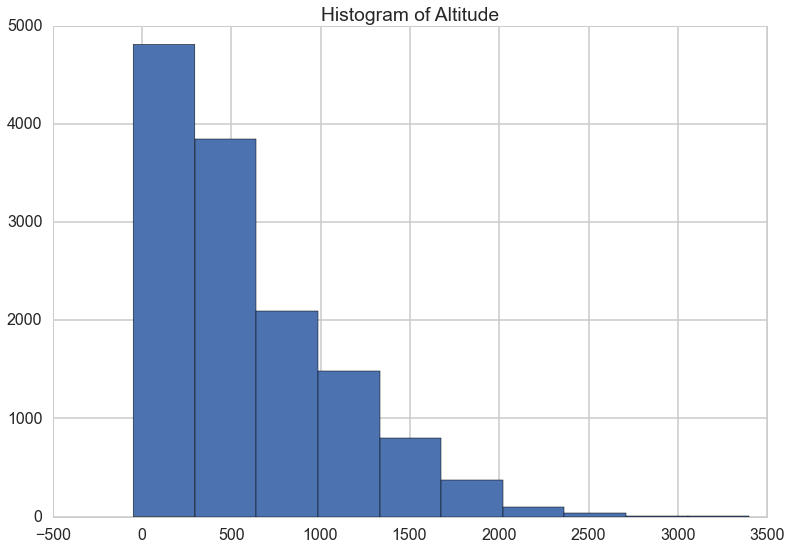

In [167]:
plt.hist(to_int_list(all_info, 'altitude'))
plt.title('Histogram of Altitude');

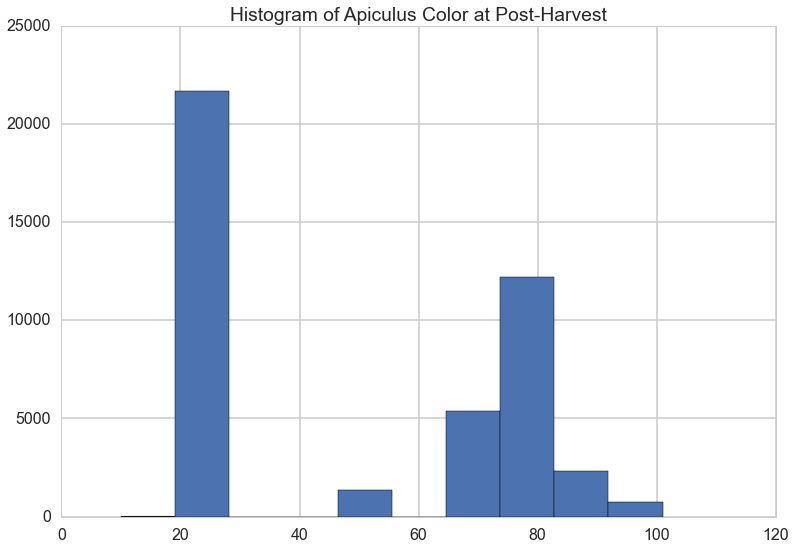

In [169]:
plt.hist(to_int_list(all_info, 'apiculus_color_post_harv'))
plt.title('Histogram of Apiculus Color at Post-Harvest');

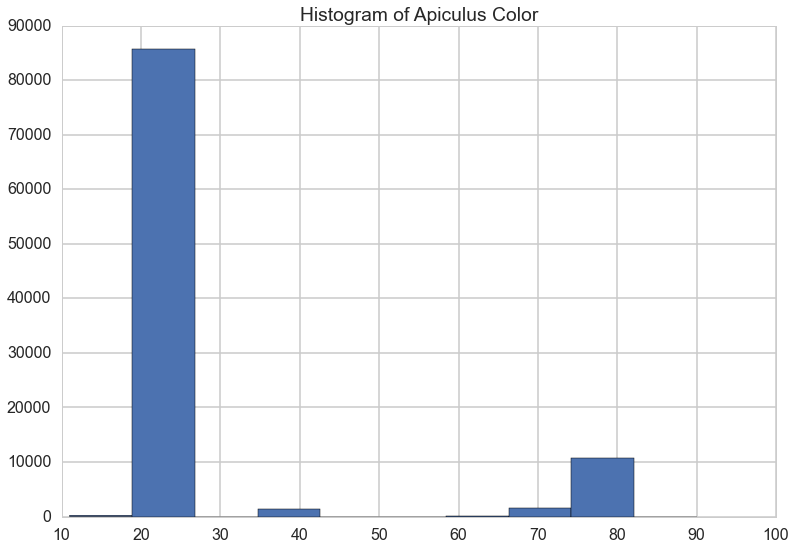

In [171]:
plt.hist(to_int_list(all_info, 'apiculus_color'))
plt.title('Histogram of Apiculus Color');

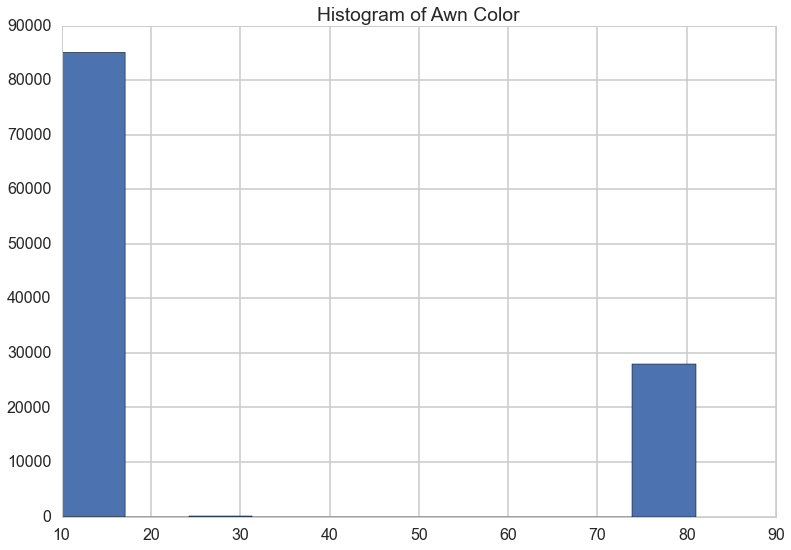

In [175]:
plt.hist(to_int_list(all_info, 'awn_color'))
plt.title('Histogram of Awn Color');

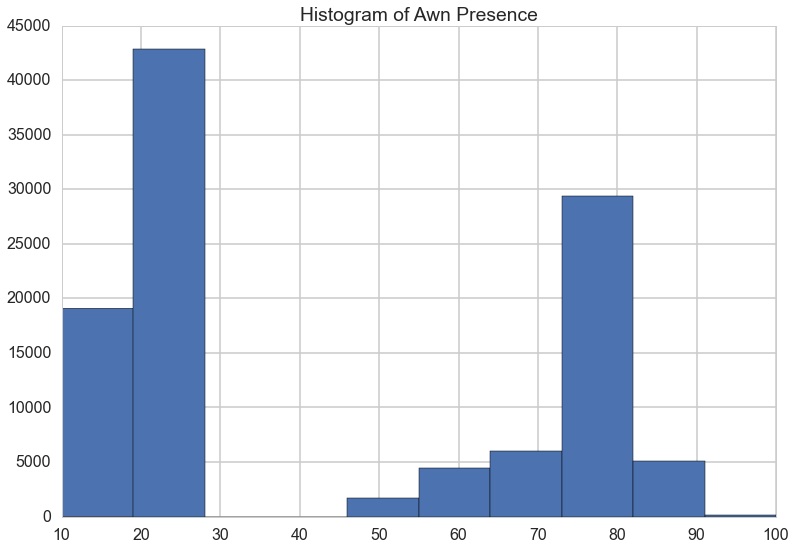

In [176]:
plt.hist(to_int_list(all_info, 'awn_presence'))
plt.title('Histogram of Awn Presence');

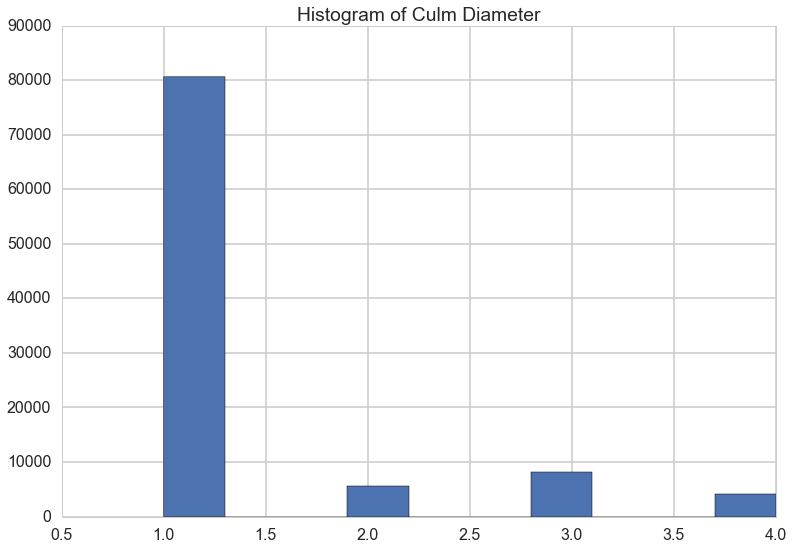

In [157]:
plt.hist(to_int_list(all_info, 'culm_diam'))
plt.title('Histogram of Culm Diameter');

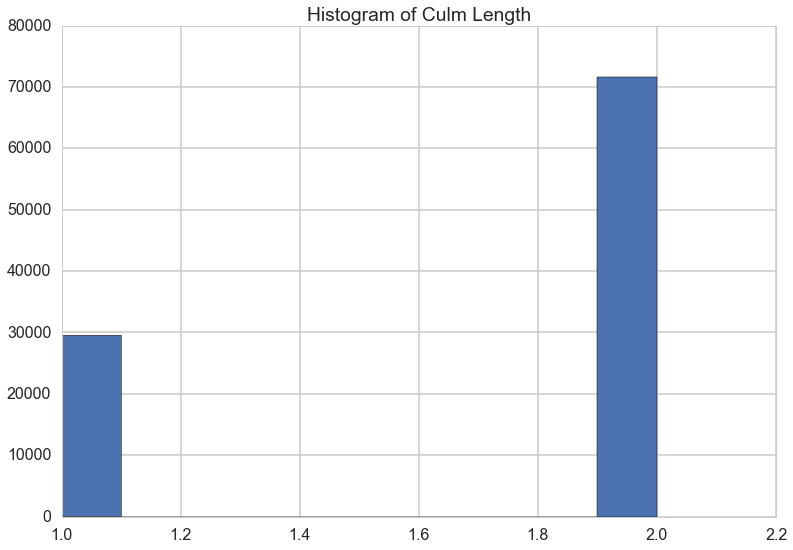

In [158]:
plt.hist(to_int_list(all_info, 'culm_length'))
plt.title('Histogram of Culm Length');

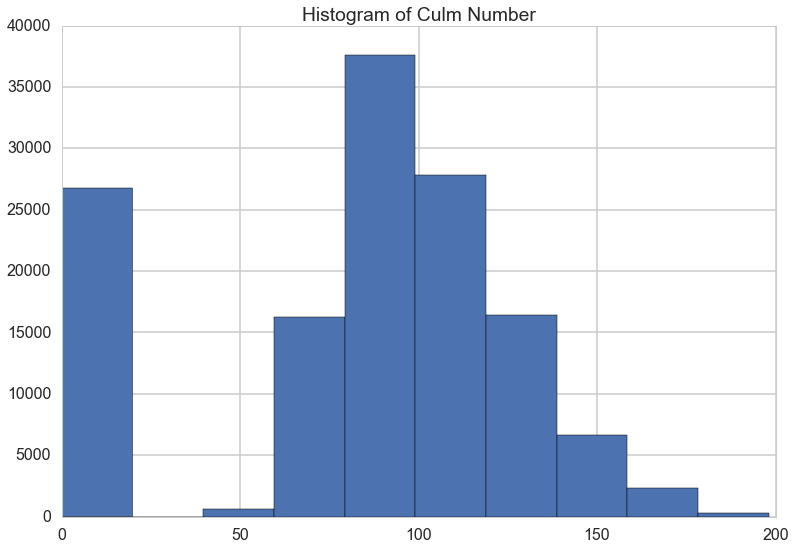

In [159]:
plt.hist(to_int_list(all_info, 'culm_num'))
plt.title('Histogram of Culm Number');

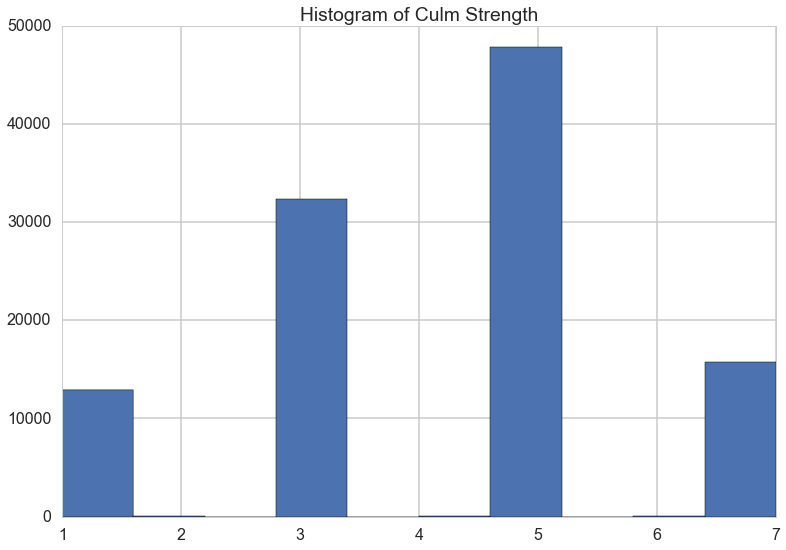

In [177]:
plt.hist(to_int_list(all_info, 'culm_strength'))
plt.title('Histogram of Culm Strength');

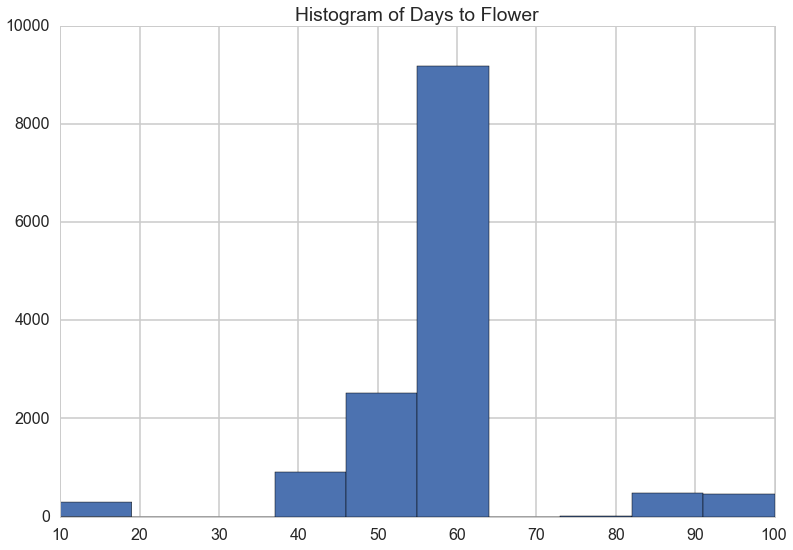

In [178]:
plt.hist(to_int_list(all_info, 'days_to_flower'))
plt.title('Histogram of Days to Flower');

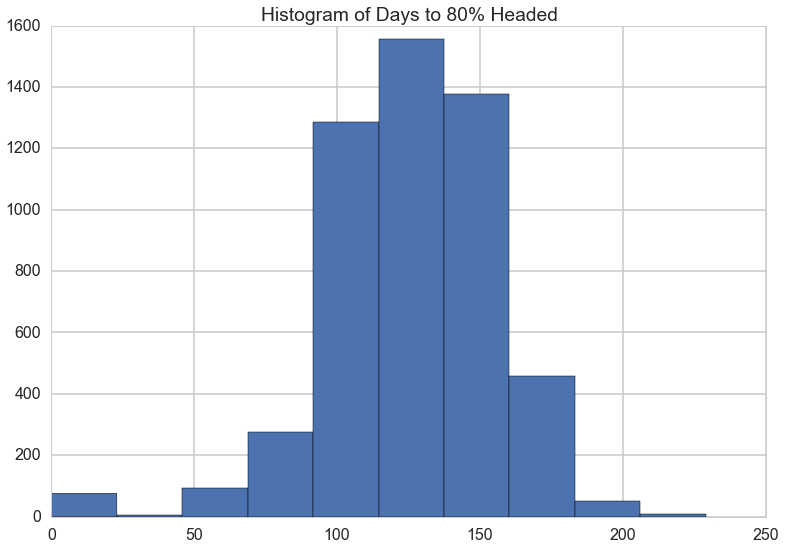

In [180]:
plt.hist(to_int_list(all_info, 'days_to_head'))
plt.title('Histogram of Days to 80% Headed');

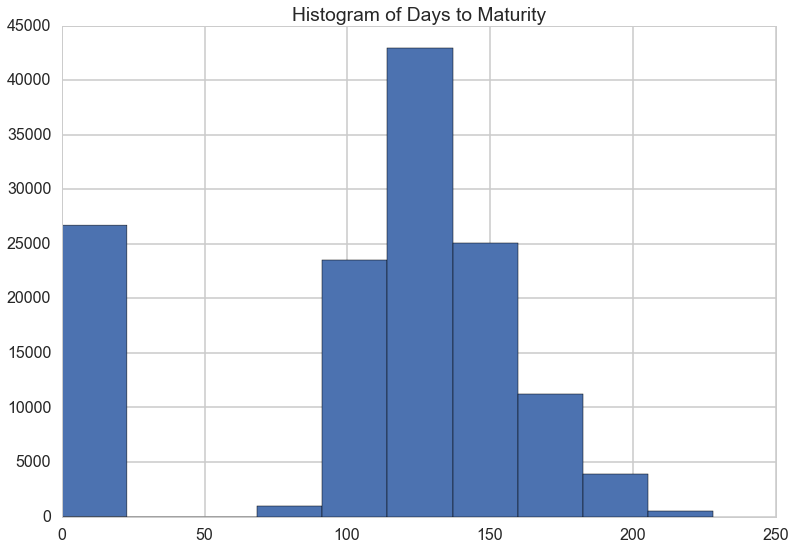

In [182]:
plt.hist(to_int_list(all_info, 'days_to_mat'))
plt.title('Histogram of Days to Maturity');

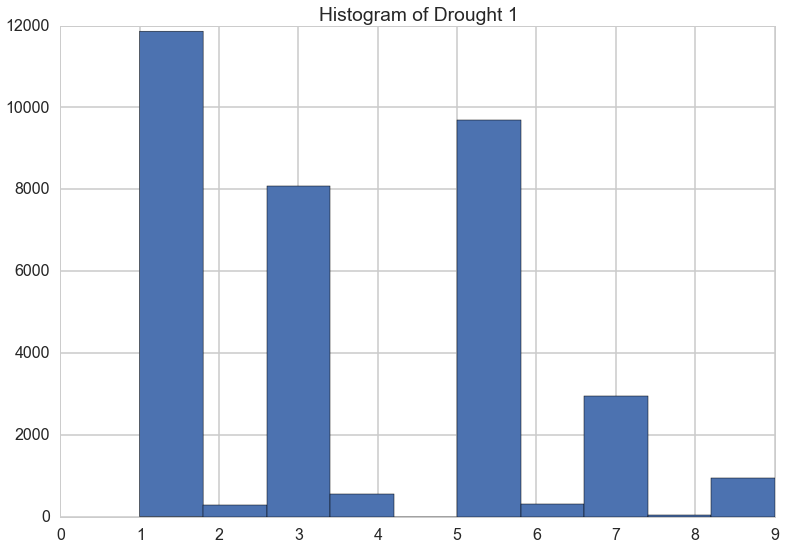

In [184]:
plt.hist(to_int_list(all_info, 'drought_1'))
plt.title('Histogram of Drought 1');

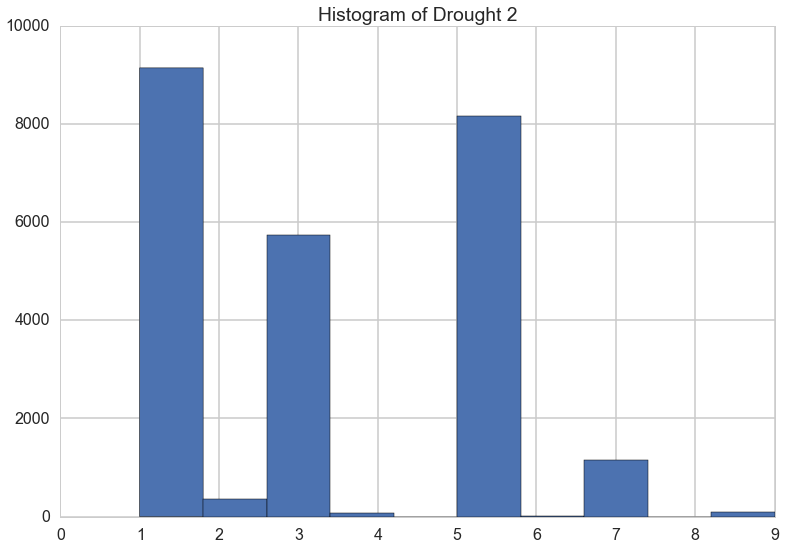

In [185]:
plt.hist(to_int_list(all_info, 'drought_2'))
plt.title('Histogram of Drought 2');

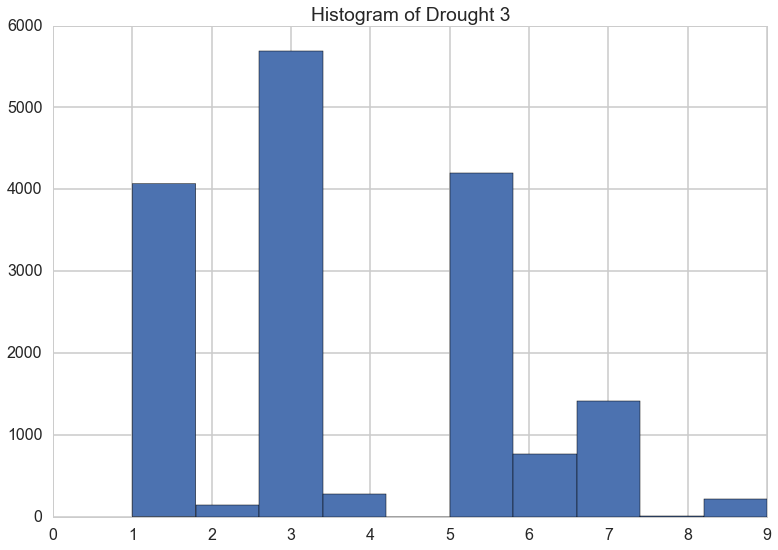

In [186]:
plt.hist(to_int_list(all_info, 'drought_3'))
plt.title('Histogram of Drought 3');

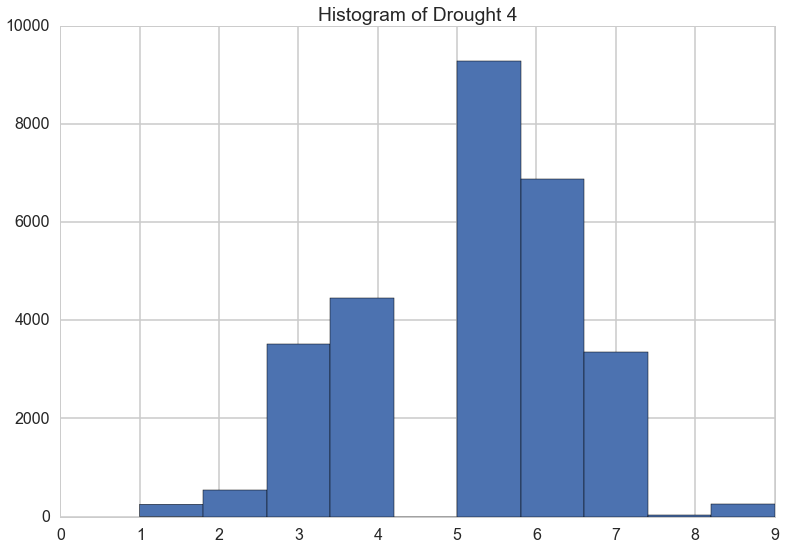

In [187]:
plt.hist(to_int_list(all_info, 'drought_4'))
plt.title('Histogram of Drought 4');

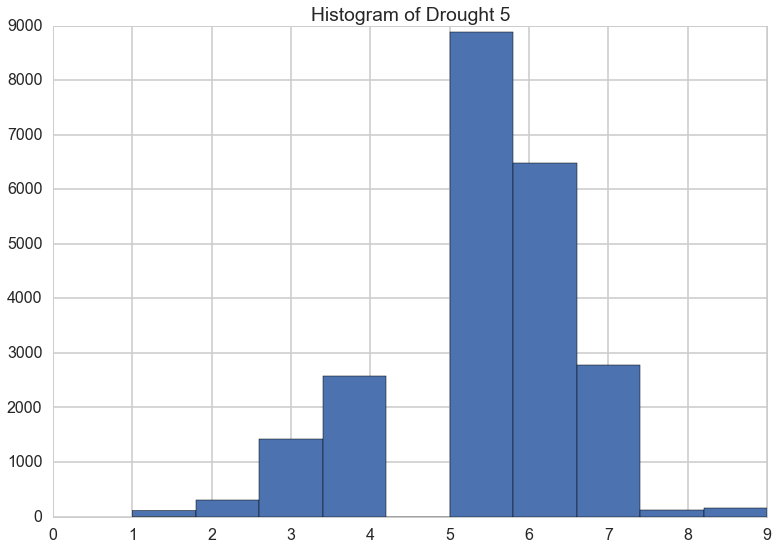

In [188]:
plt.hist(to_int_list(all_info, 'drought_5'))
plt.title('Histogram of Drought 5');

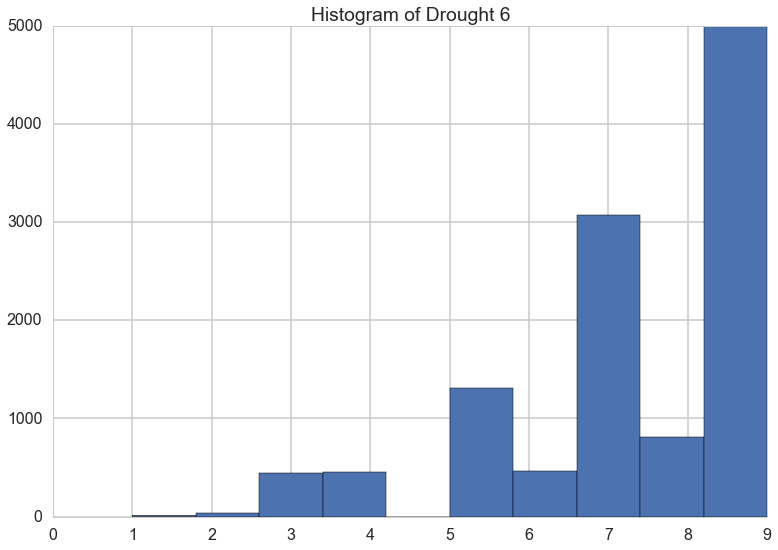

In [189]:
plt.hist(to_int_list(all_info, 'drought_6'))
plt.title('Histogram of Drought 6');

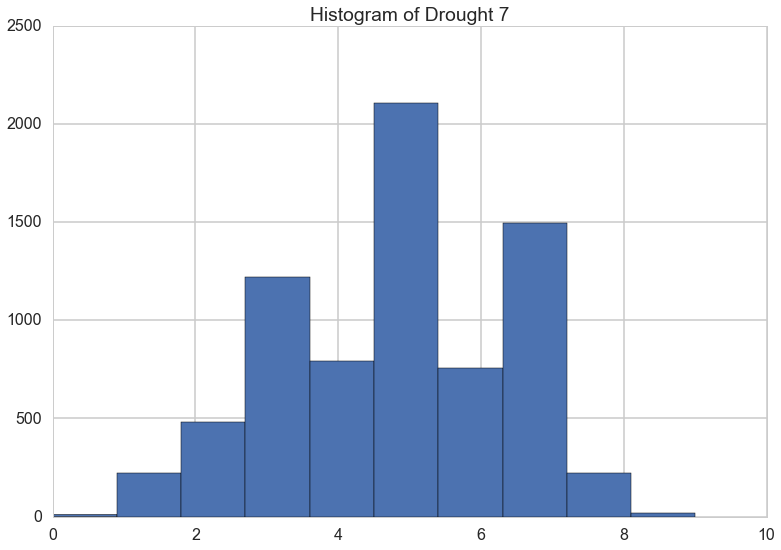

In [190]:
plt.hist(to_int_list(all_info, 'drought_7'))
plt.title('Histogram of Drought 7');

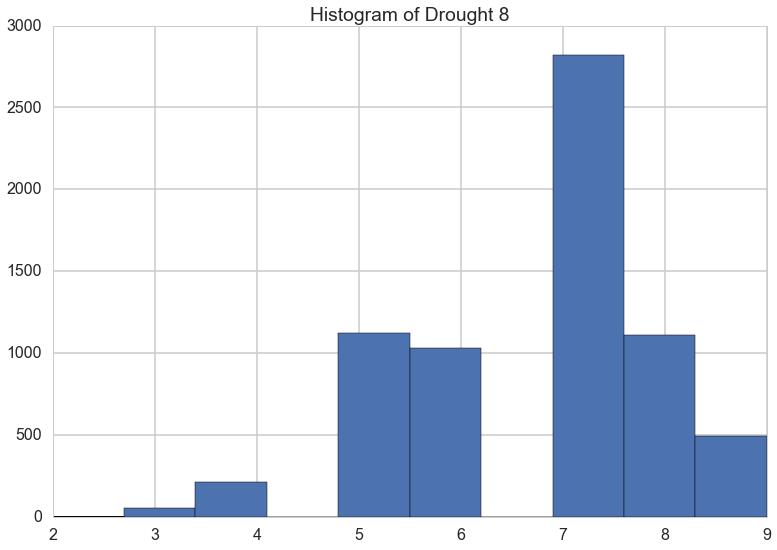

In [191]:
plt.hist(to_int_list(all_info, 'drought_8'))
plt.title('Histogram of Drought 8');

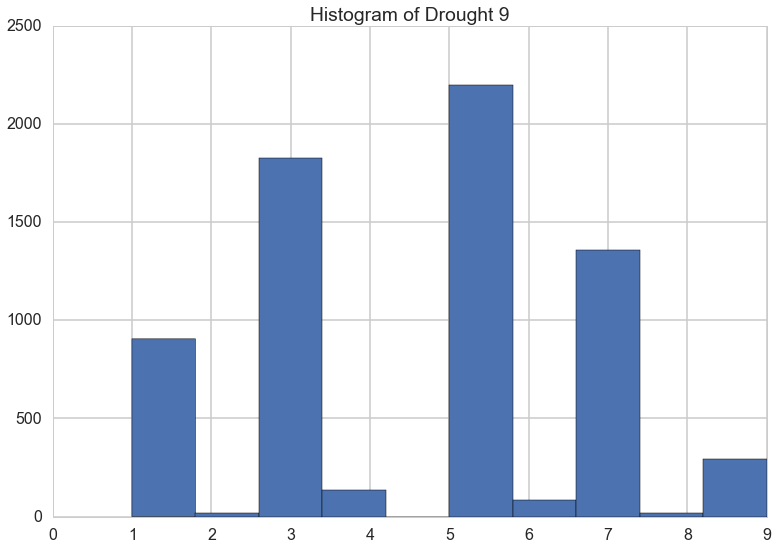

In [192]:
plt.hist(to_int_list(all_info, 'drought_9'))
plt.title('Histogram of Drought 9');

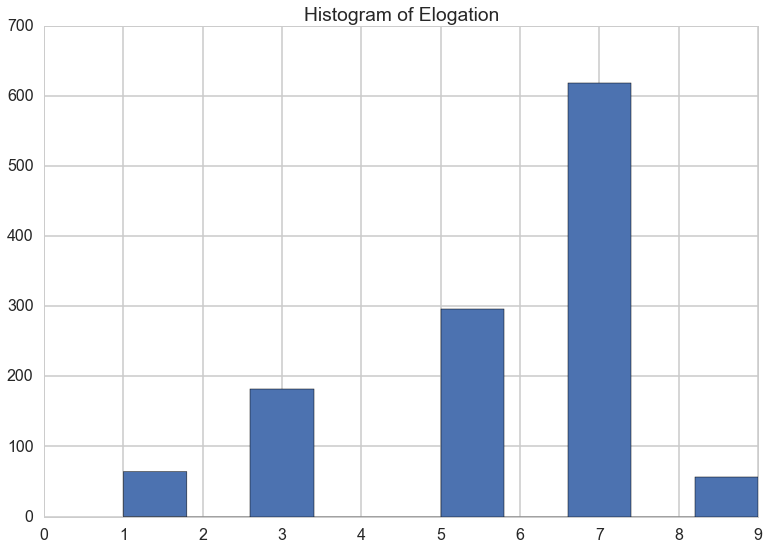

In [194]:
plt.hist(to_int_list(all_info, 'elogation'))
plt.title('Histogram of Elogation');

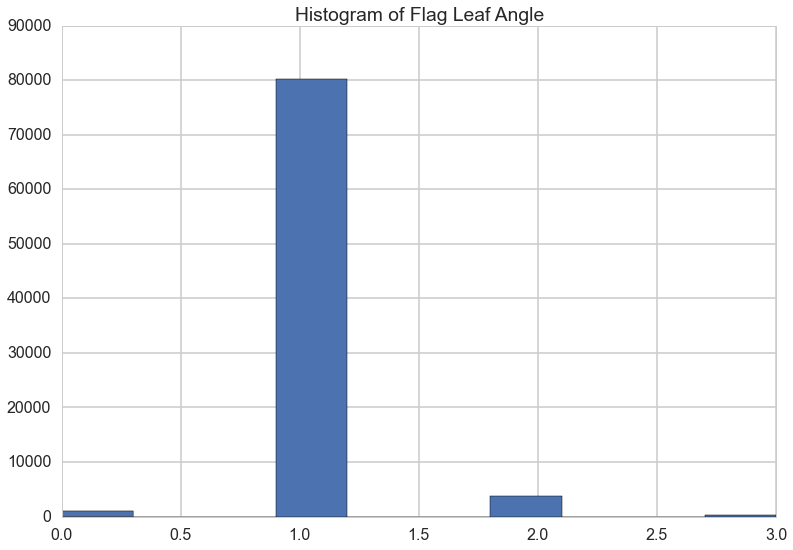

In [195]:
plt.hist(to_int_list(all_info, 'flag_leaf_angle'))
plt.title('Histogram of Flag Leaf Angle');

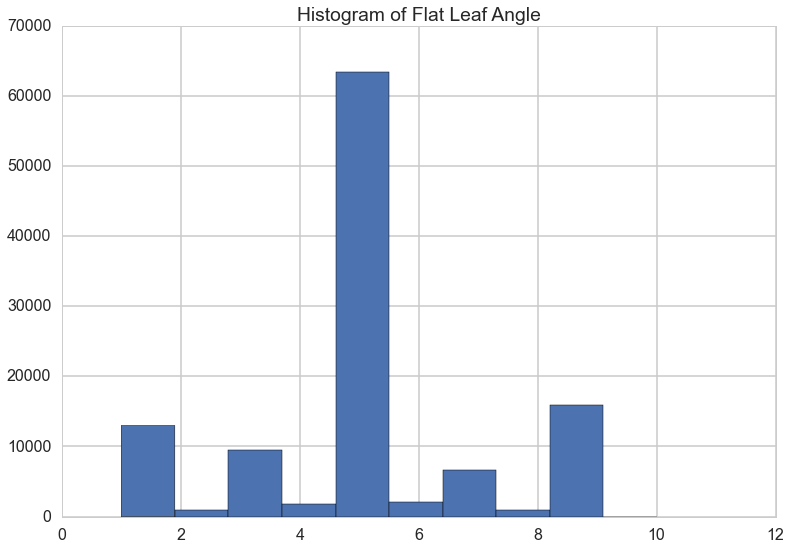

In [196]:
plt.hist(to_int_list(all_info, 'flat_leaf_angle'))
plt.title('Histogram of Flat Leaf Angle');

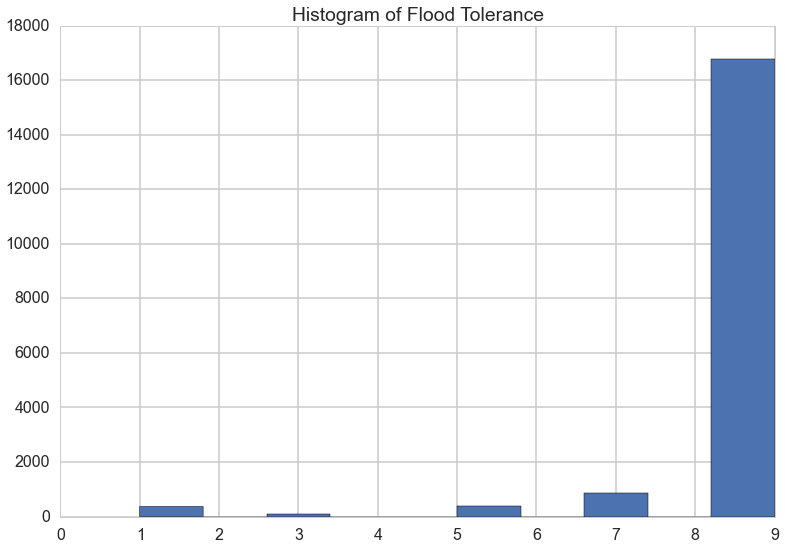

In [197]:
plt.hist(to_int_list(all_info, 'flood_tolerance'))
plt.title('Histogram of Flood Tolerance');

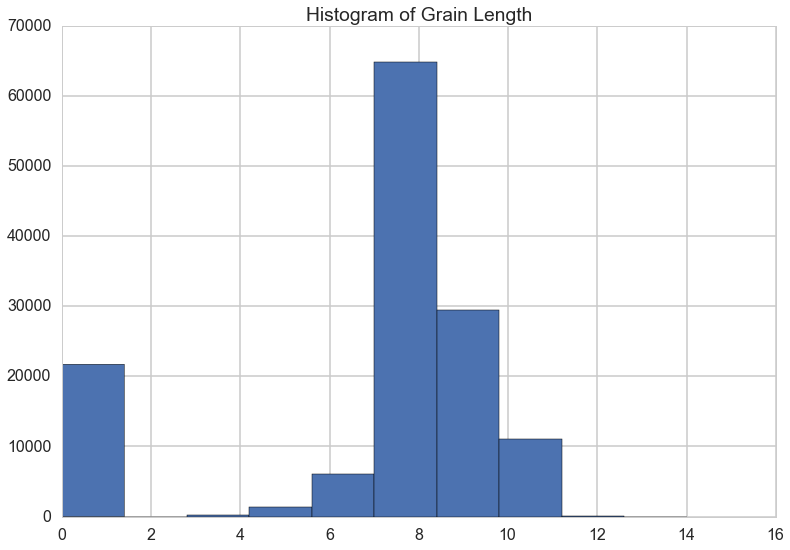

In [198]:
plt.hist(to_int_list(all_info, 'grain_len'))
plt.title('Histogram of Grain Length');

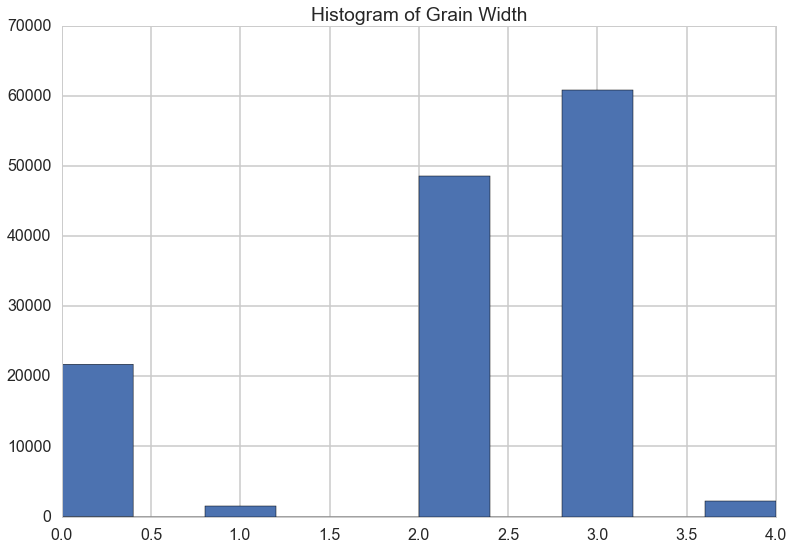

In [199]:
plt.hist(to_int_list(all_info, 'grain_wid'))
plt.title('Histogram of Grain Width');

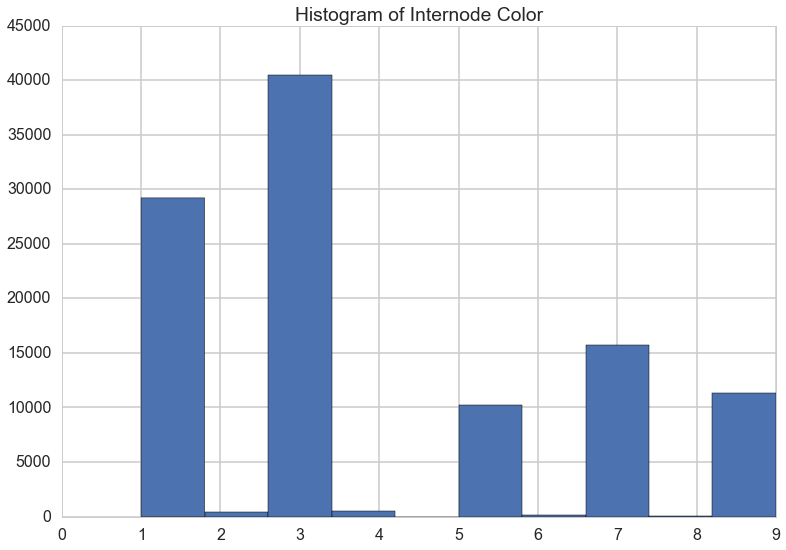

In [202]:
plt.hist(to_int_list(all_info, 'internode_color'))
plt.title('Histogram of Internode Color');

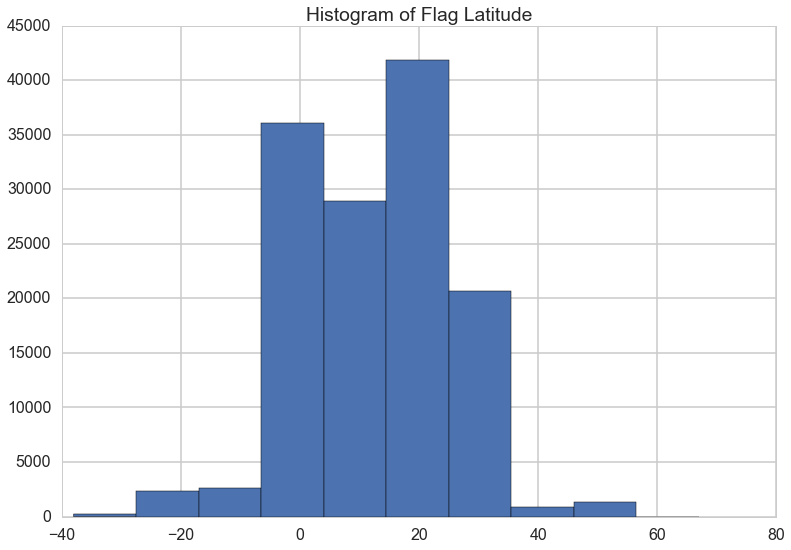

In [203]:
plt.hist(to_int_list(all_info, 'latitude'))
plt.title('Histogram of Flag Latitude');

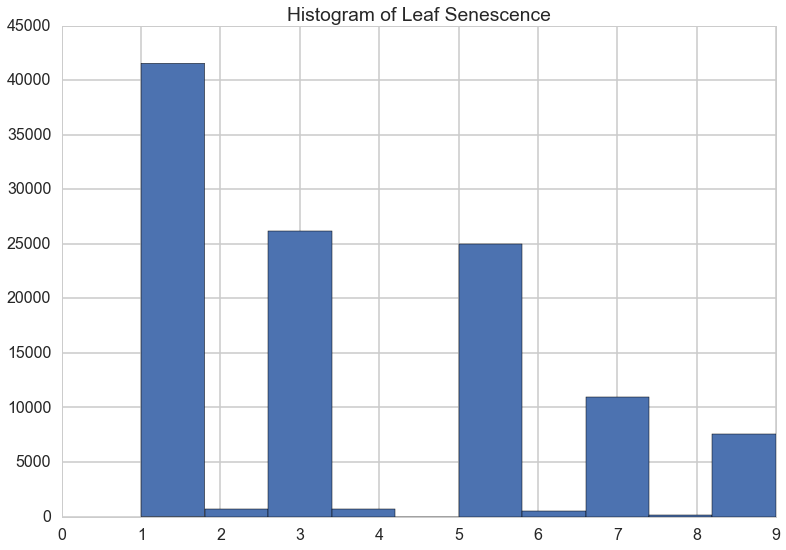

In [204]:
plt.hist(to_int_list(all_info, 'leaf_senescence'))
plt.title('Histogram of Leaf Senescence');

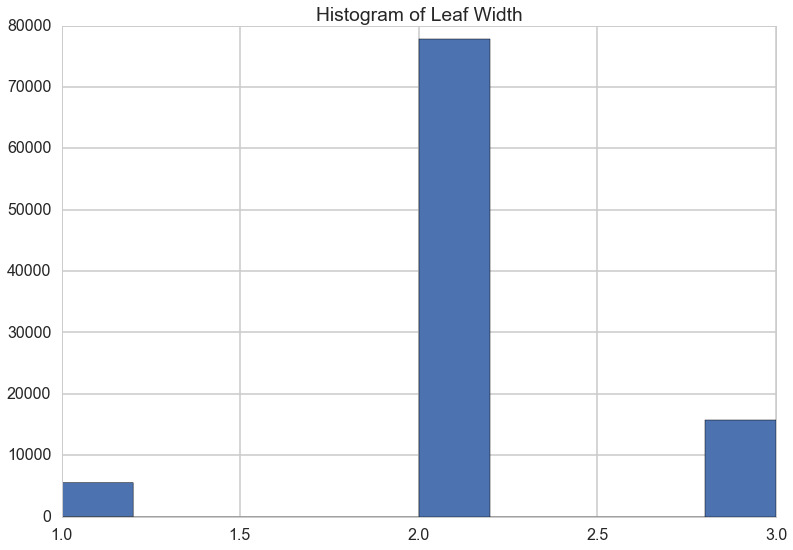

In [205]:
plt.hist(to_int_list(all_info, 'leaf_width'))
plt.title('Histogram of Leaf Width');

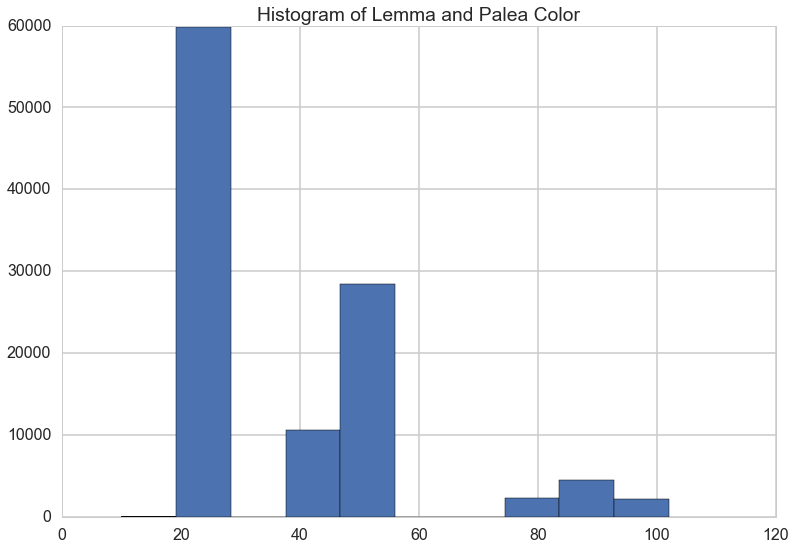

In [206]:
plt.hist(to_int_list(all_info, 'lemma_and_palea_color'))
plt.title('Histogram of Lemma and Palea Color');

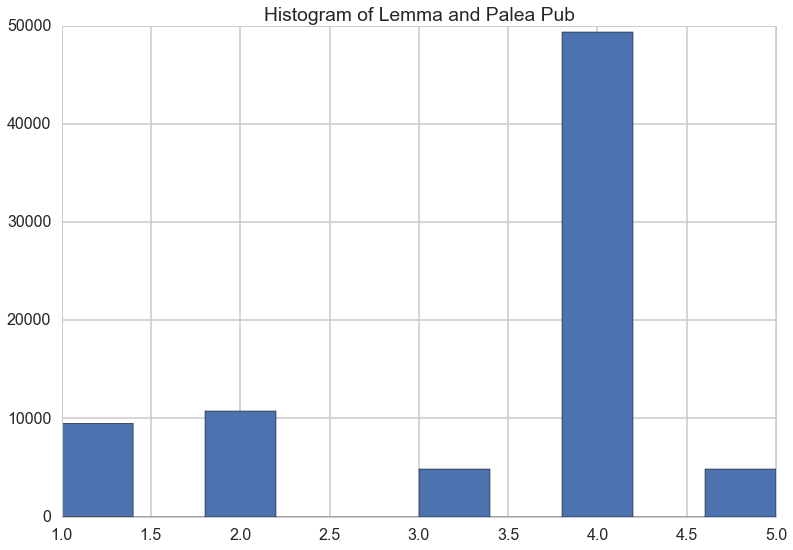

In [207]:
plt.hist(to_int_list(all_info, 'lemma_and_palea_pub'))
plt.title('Histogram of Lemma and Palea Pub');

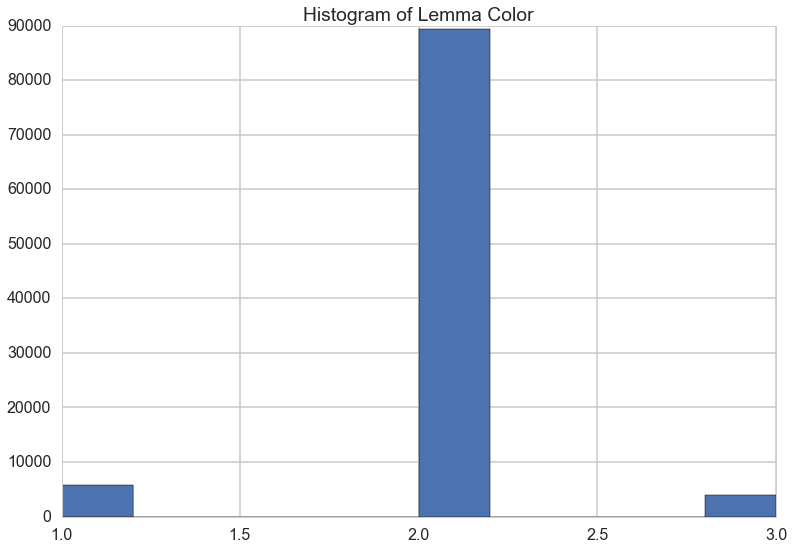

In [208]:
plt.hist(to_int_list(all_info, 'lemma_color'))
plt.title('Histogram of Lemma Color');

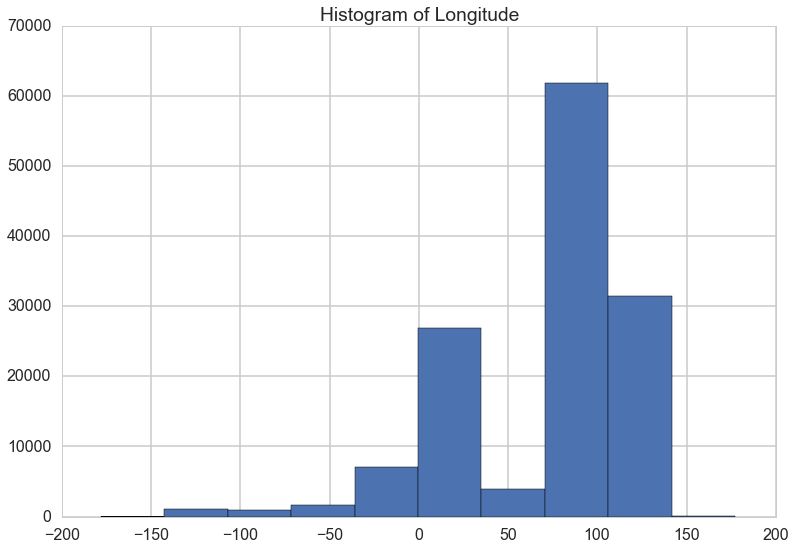

In [209]:
plt.hist(to_int_list(all_info, 'longitude'))
plt.title('Histogram of Longitude');

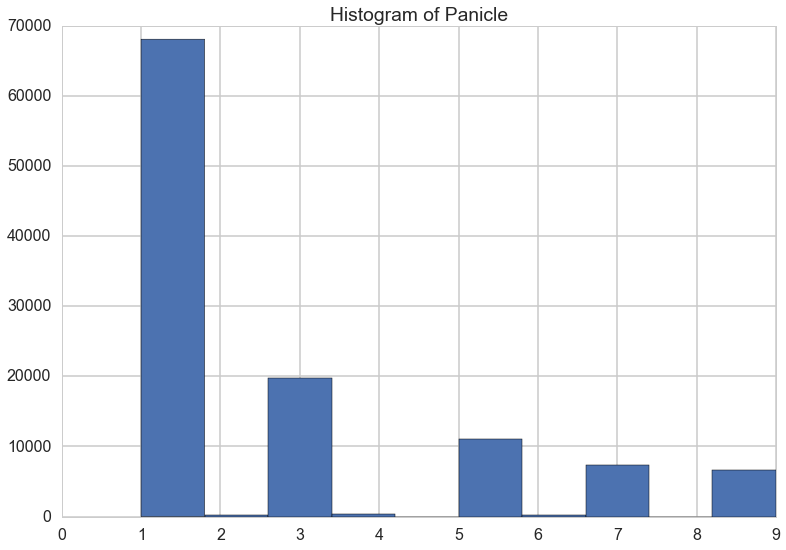

In [210]:
plt.hist(to_int_list(all_info, 'panicle'))
plt.title('Histogram of Panicle');

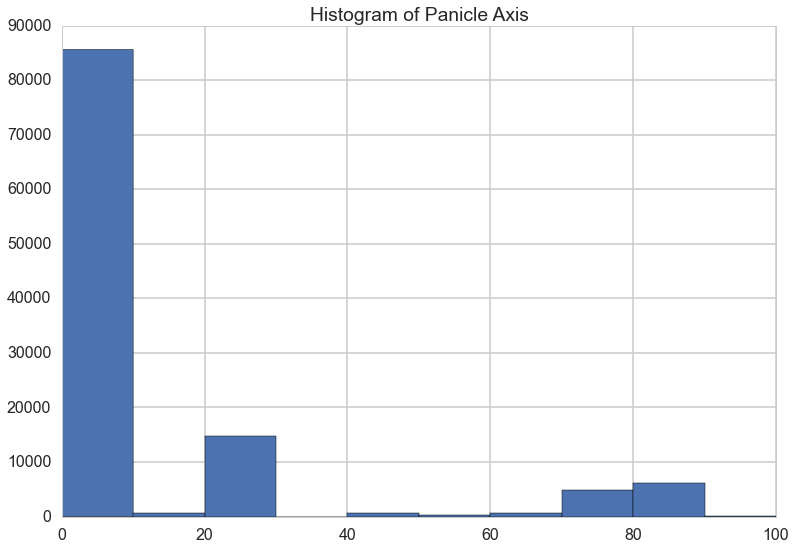

In [211]:
plt.hist(to_int_list(all_info, 'panicle_axis'))
plt.title('Histogram of Panicle Axis');

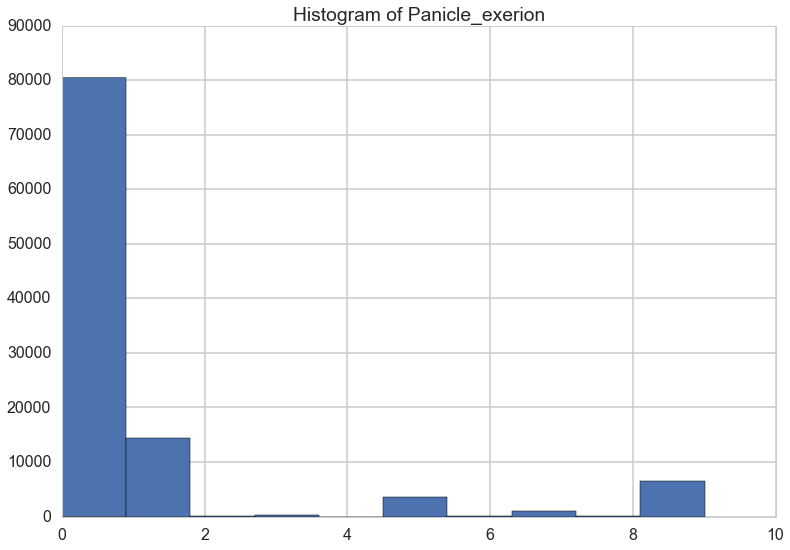

In [212]:
plt.hist(to_int_list(all_info, 'panicle_exerion'))
plt.title('Histogram of Panicle_exerion');

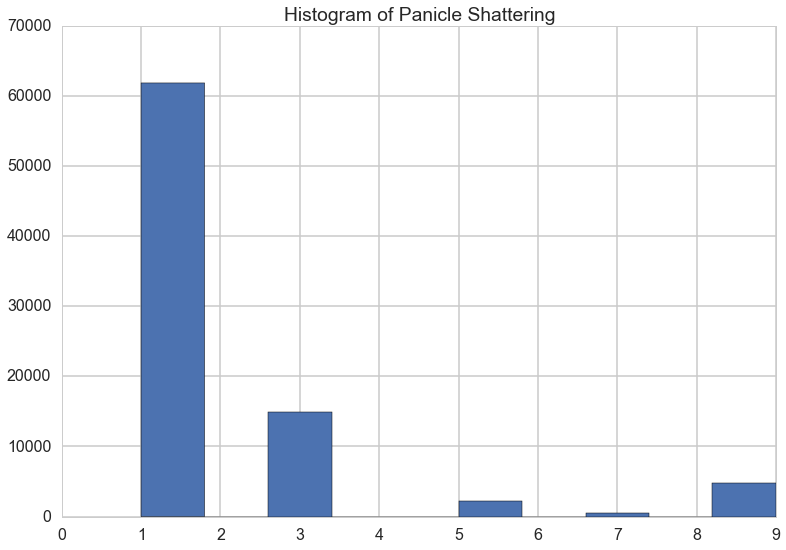

In [213]:
plt.hist(to_int_list(all_info, 'panicle_shattering'))
plt.title('Histogram of Panicle Shattering');

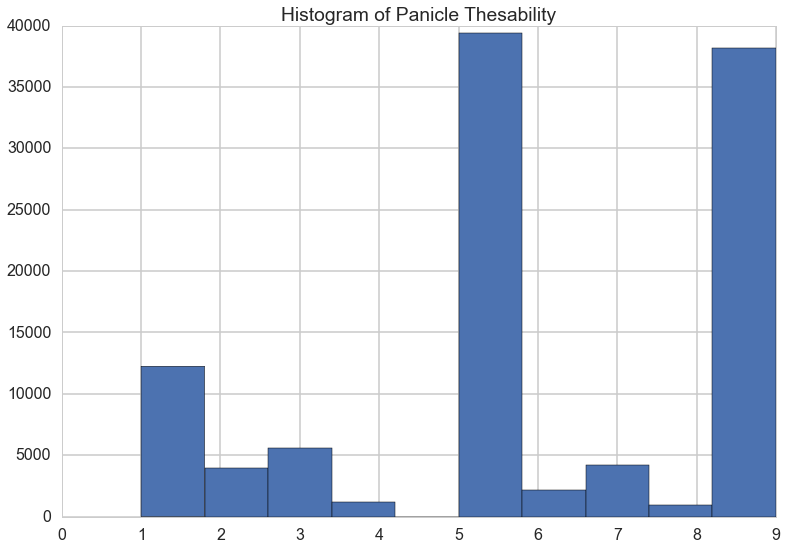

In [214]:
plt.hist(to_int_list(all_info, 'panicle_thesability'))
plt.title('Histogram of Panicle Thesability');

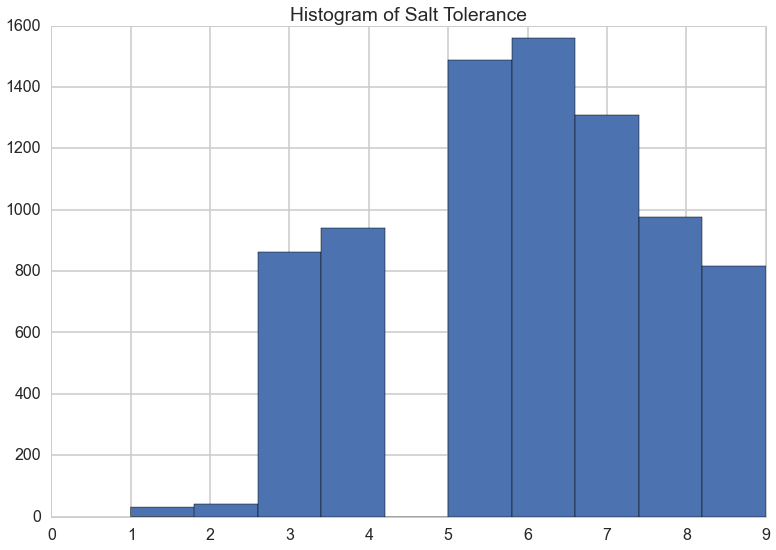

In [215]:
plt.hist(to_int_list(all_info, 'salt_tolerance'))
plt.title('Histogram of Salt Tolerance');

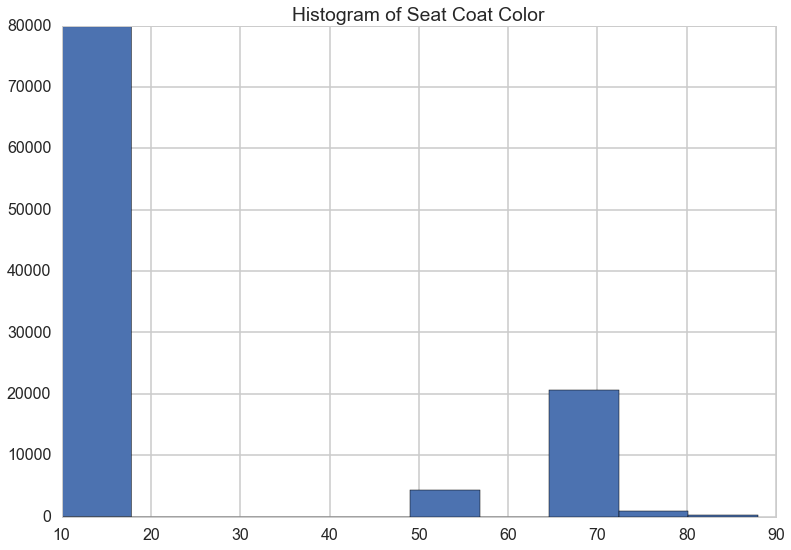

In [216]:
plt.hist(to_int_list(all_info, 'seat_coat_color'))
plt.title('Histogram of Seat Coat Color');

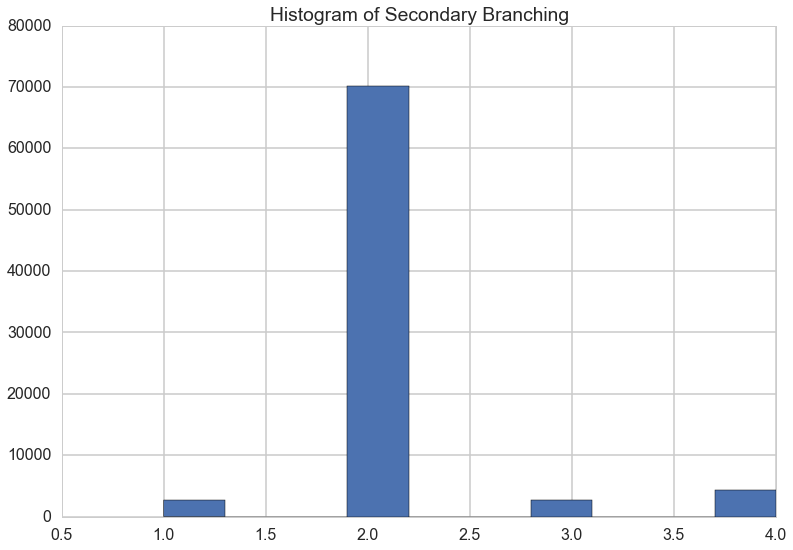

In [217]:
plt.hist(to_int_list(all_info, 'secondary_branching'))
plt.title('Histogram of Secondary Branching');

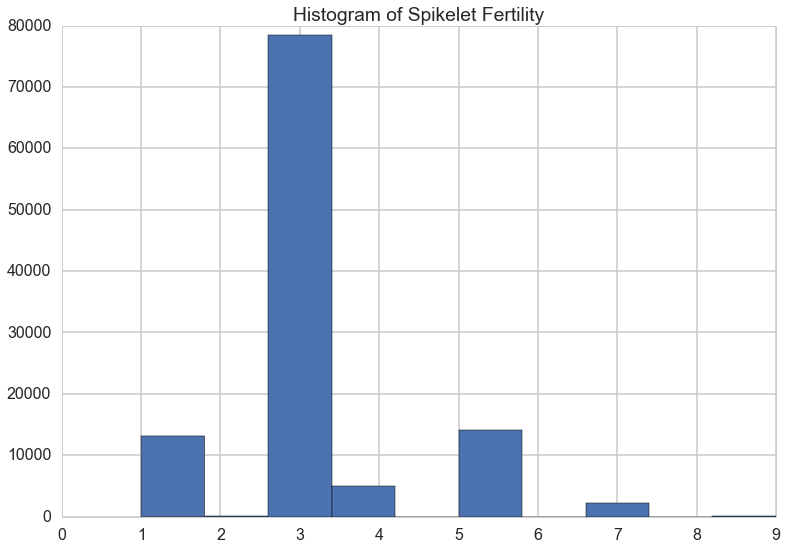

In [219]:
plt.hist(to_int_list(all_info, 'spikelet_fertility'))
plt.title('Histogram of Spikelet Fertility');

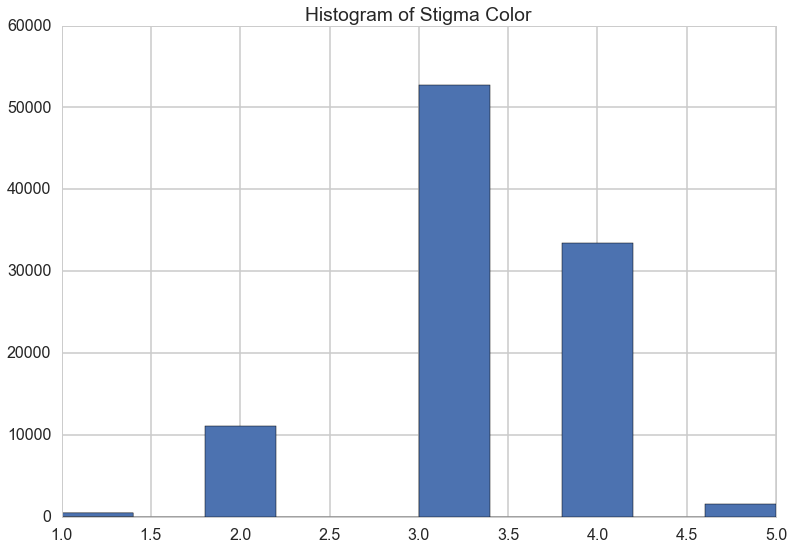

In [220]:
plt.hist(to_int_list(all_info, 'stigma_color'))
plt.title('Histogram of Stigma Color');

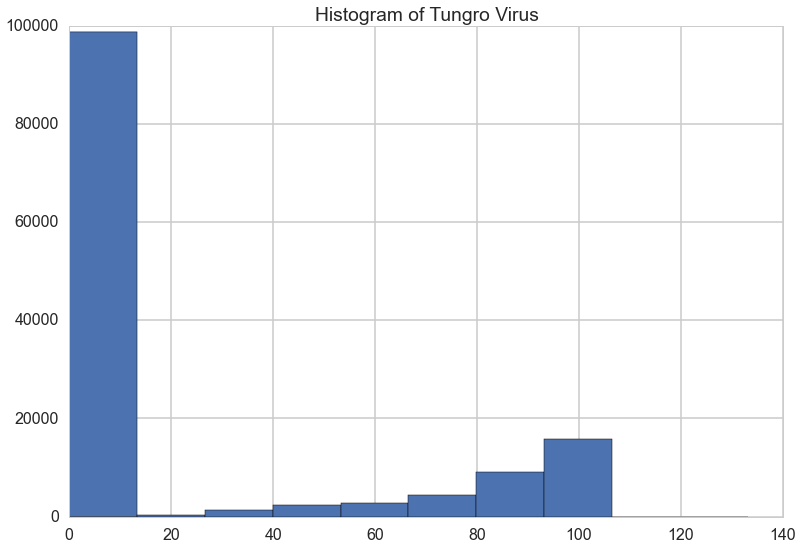

In [221]:
plt.hist(to_int_list(all_info, 'tungro_virus'))
plt.title('Histogram of Tungro Virus');

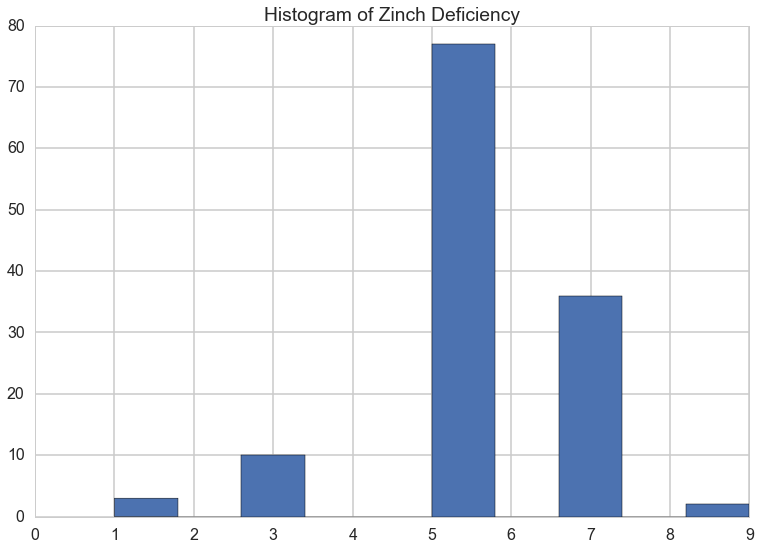

In [222]:
plt.hist(to_int_list(all_info, 'zinc_def_1'))
plt.title('Histogram of Zinch Deficiency');

In [237]:
def unique_values(df, column):
    print "%s:" % column
    print np.unique(list(df[column]))
    print ''

In [251]:
unique_values(all_info, 'auricle_color')
unique_values(all_info, 'bacterial_blight')
unique_values(all_info, 'basal_color')
unique_values(all_info, 'blade_color')
unique_values(all_info, 'blade_pub')
unique_values(all_info, 'blast')
unique_values(all_info, 'blade_pub')
unique_values(all_info, 'collar_color')
unique_values(all_info, 'culm_angle')
#unique_values(all_info, 'district')
#unique_values(all_info, 'donor_country')
unique_values(all_info, 'endosperm_type')
unique_values(all_info, 'fao_in_trust')
unique_values(all_info, 'leaf_angle')
unique_values(all_info, 'leaf_length')
unique_values(all_info, 'leaf_texture')
unique_values(all_info, 'lemma_color_at_anthesis')
unique_values(all_info, 'ligule_color')
unique_values(all_info, 'ligule_shape')
unique_values(all_info, 'lingule_pub')
unique_values(all_info, 'multilateral_system')
unique_values(all_info, 'node_color')
#unique_values(all_info, 'province')
unique_values(all_info, 'seedling_height')
unique_values(all_info, 'sheath_blight')
#unique_values(all_info, 'source_country')
unique_values(all_info, 'special_traits')
unique_values(all_info, 'species_name')
unique_values(all_info, 'status')
unique_values(all_info, 'subpopulation')
#unique_values(all_info, 'town')
unique_values(all_info, 'varietal_group')
unique_values(all_info, 'variety_group_from_morph')
#unique_values(all_info, 'village')

auricle_color:
['' 'Absent' 'Green' 'Light green' 'Mixture' 'Purple' 'Purple shade'
 'Yellowish green']

bacterial_blight:
['' 'Highly susceptible' 'Moderately resistant' 'Moderately susceptible'
 'Resistant' 'Susceptible']

basal_color:
['' 'Green' 'Light purple' 'Mixture' 'Purple' 'Purple lines']

blade_color:
['' 'Dark green' 'Green' 'Light green' 'Mixture' 'Purple' 'Purple blotch'
 'Purple margin' 'Purple tips']

blade_pub:
['' 'Glabrous' 'Intermediate' 'Mixture' 'Pubescent']

blast:
['' 'Moderately resistant' 'Resistant' 'Susceptible']

blade_pub:
['' 'Glabrous' 'Intermediate' 'Mixture' 'Pubescent']

collar_color:
['' 'Absent(collarless)' 'Green' 'Light green' 'Mixture' 'Purple']

culm_angle:
['' 'Erect (1)' 'Erect (2)' 'Intermediate (3)' 'Intermediate (4)' 'Mixture'
 'Open (5)' 'Open (6)' 'Procumbent' 'Spreading (7)' 'Spreading (8)']

endosperm_type:
['' 'Glutinous(waxy)' 'Intermediate' 'Mixture' 'Non-glutinous(non-waxy)']

fao_in_trust:
['' 'Yes']

leaf_angle:
['' 'Drooping(7)' 